# **ℹ️Info**
# This project investigates the quality characteristics of red wine using the popular Wine Quality dataset. The dataset consists of several physicochemical properties of red wine samples, including:

Fixed acidity, Volatile acidity, Citric acid, Residual sugar, Chlorides, Free sulfur dioxide, Total sulfur dioxide, Density, pH, Sulphates and Alcohol

Each wine sample in the dataset is labeled with a quality score ranging from 0 to 10, representing the wine's perceived quality by sensory experts.

# **📌Objective**
The main objective of this project is to predict the quality rating of red wine based on its physicochemical attributes. Accurately estimating wine quality can help wineries, distributors, and consumers make informed decisions about wine production and selection.

# ⭐Importing all necessary libraries

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# ⭐Importing data set

In [26]:
df = pd.read_csv('winequality-red.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


✨ **Data info & Checking Null vlues**

In [28]:
df.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [29]:
df.shape

(1599, 12)

In [30]:
df.size

19188

Check duplicate values

In [31]:
df.duplicated().sum()

np.int64(240)

# Handling with duplicate values

In [32]:
df = df.drop_duplicates()
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


**Heatmap for beter understanding and  Check corealation between physicochemical ingredients**

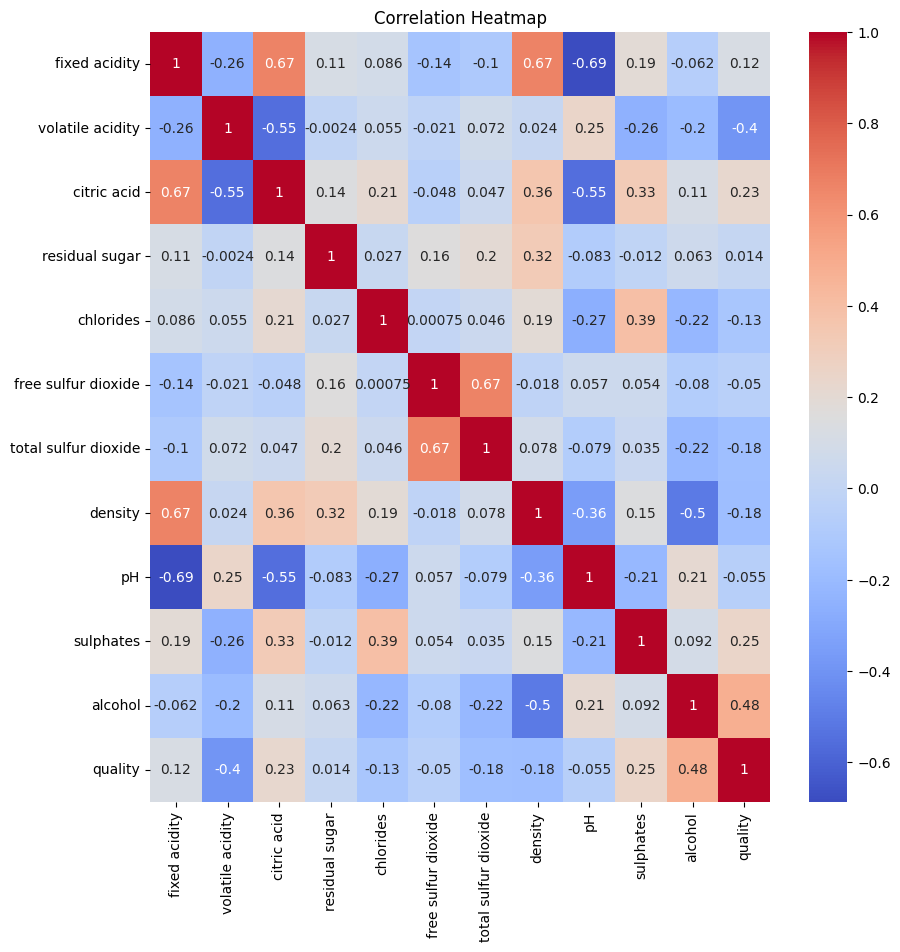

In [33]:
plt.figure(figsize=(10, 10))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# *Create a different funciton of quality grade*

In [34]:
df['quality grade'] = df['quality'].apply(lambda x: 'high' if x >= 7 else ('medium' if x > 4 and x < 7 else 'low'))
df

/tmp/ipython-input-3986670313.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['quality grade'] = df['quality'].apply(lambda x: 'high' if x >= 7 else ('medium' if x > 4 and x < 7 else 'low'))


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality grade
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,medium
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,medium
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,medium
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,medium
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,medium
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,medium
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,medium
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,medium


# ⭐ Data visualisation

⬇️ Line plot which show relation of Alcohol and Quality

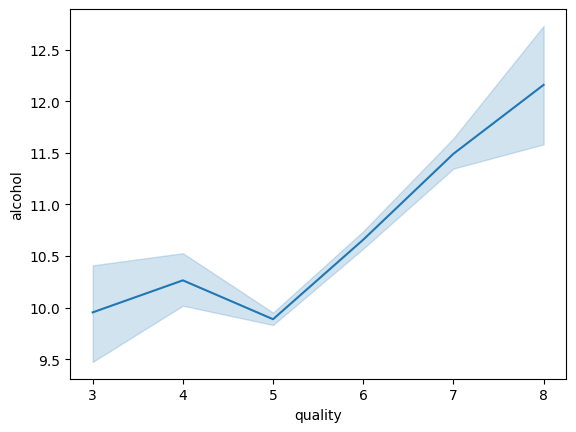

In [35]:
sns.lineplot(x='quality', y='alcohol', data=df)
plt.show()

⬇️ Line plot which show the relation between Quality and Sulphates

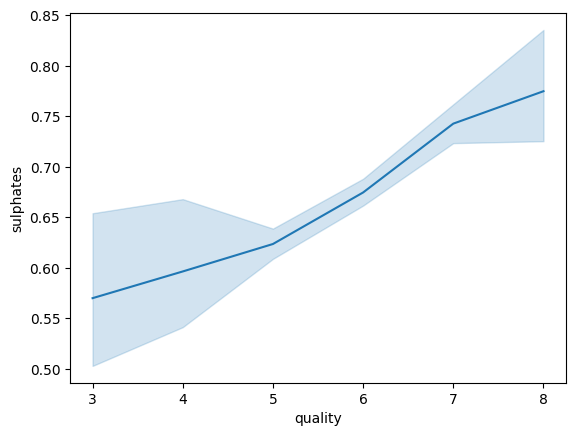

In [36]:
sns.lineplot(x='quality', y='sulphates', data=df)
plt.show()

# ⬇️ Box plot which show relation between Quality Grade and Alcohol

 **Plot before removing outliyers**

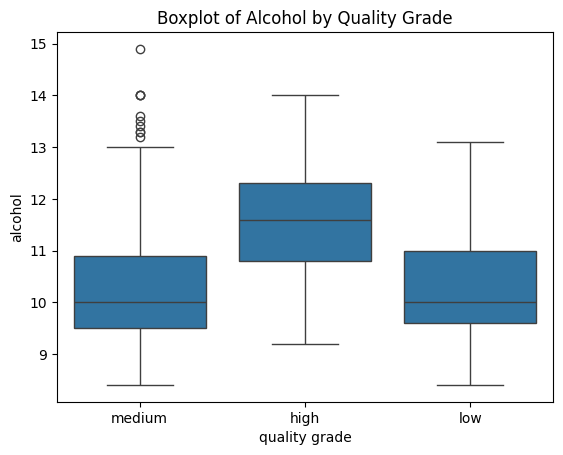

In [37]:
sns.boxplot(x='quality grade', y='alcohol', data=df)
plt.title('Boxplot of Alcohol by Quality Grade')
plt.show()

**Plot after remove outliyers**

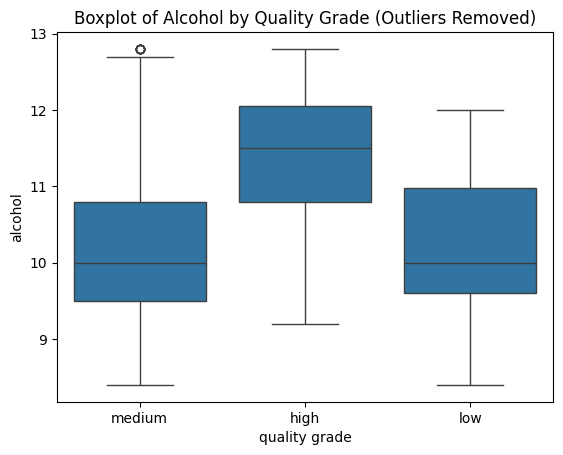

In [38]:
# Calculate IQR for 'alcohol'
Q1 = df['alcohol'].quantile(0.30)
Q3 = df['alcohol'].quantile(0.70)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
df_filtered = df[(df['alcohol'] >= lower_bound) & (df['alcohol'] <= upper_bound)]

# Display box plot of filtered data
sns.boxplot(x='quality grade', y='alcohol', data=df_filtered)
plt.title('Boxplot of Alcohol by Quality Grade (Outliers Removed)')
plt.show()

<Axes: xlabel='volatile acidity', ylabel='quality'>

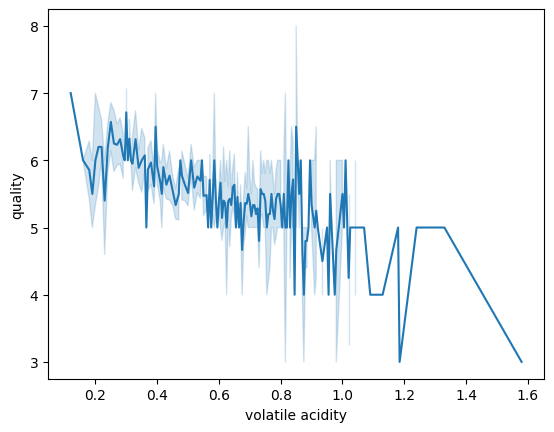

In [39]:
sns.lineplot(y='quality', x='volatile acidity', data=df)

⬇️ Plot of Quality unique count

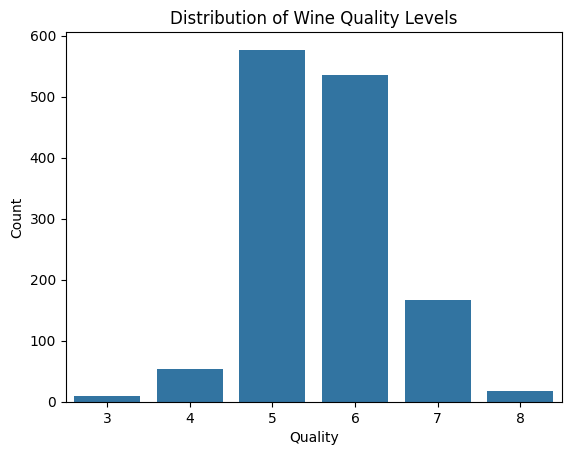

In [40]:
sns.countplot(x='quality', data=df)
plt.title('Distribution of Wine Quality Levels')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.show()

# High quality red vine DF

In [41]:
highest_quality_df = df[df['quality'] == df['quality'].max()]
display(highest_quality_df)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality grade
267,7.9,0.35,0.46,3.6,0.078,15.0,37.0,0.99730,3.35,0.86,12.8,8,high
278,10.3,0.32,0.45,6.4,0.073,5.0,13.0,0.99760,3.23,0.82,12.6,8,high
390,5.6,0.85,0.05,1.4,0.045,12.0,88.0,0.99240,3.56,0.82,12.9,8,high
440,12.6,0.31,0.72,2.2,0.072,6.0,29.0,0.99870,2.88,0.82,9.8,8,high
455,11.3,0.62,0.67,5.2,0.086,6.0,19.0,0.99880,3.22,0.69,13.4,8,high
481,9.4,0.30,0.56,2.8,0.080,6.0,17.0,0.99640,3.15,0.92,11.7,8,high
495,10.7,0.35,0.53,2.6,0.070,5.0,16.0,0.99720,3.15,0.65,11.0,8,high
588,5.0,0.42,0.24,2.0,0.060,19.0,50.0,0.99170,3.72,0.74,14.0,8,high
828,7.8,0.57,0.09,2.3,0.065,34.0,45.0,0.99417,3.46,0.74,12.7,8,high
1061,9.1,0.40,0.50,1.8,0.071,7.0,16.0,0.99462,3.21,0.69,12.5,8,high


In [42]:
quality_df = highest_quality_df[['alcohol','pH','volatile acidity','sulphates']]
quality_df_mean = quality_df.mean()
quality_df_mean

,0
alcohol,12.158824
pH,3.274118
volatile acidity,0.427647
sulphates,0.774706


# ⬇️ Ingredients of a top quality Wine

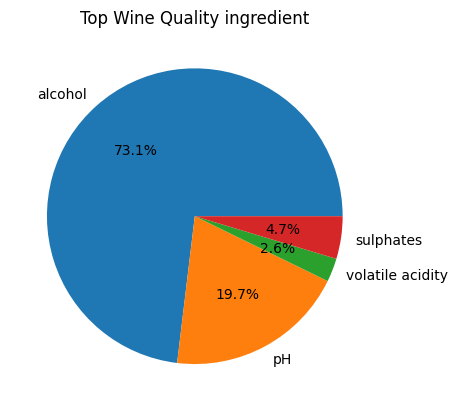

In [43]:
plt.pie(quality_df_mean, labels=quality_df_mean.index, autopct='%1.1f%%')
plt.title('Top Wine Quality ingredient')
plt.show()

# Here we use Lable Encoder for encode the lables of quality grade

In [44]:
le = LabelEncoder()
df['quality grade'] = le.fit_transform(df['quality grade'])
df

/tmp/ipython-input-364808148.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['quality grade'] = le.fit_transform(df['quality grade'])


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality grade
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,2
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,2
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,2
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,2
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,2
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,2
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,2


## Train test split

In [45]:
x = df.drop(['quality grade','quality'], axis=1)
y = df['quality grade']
# Train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
y_train

,quality grade
1016,0
1519,2
452,2
847,2
58,2
...,...
1285,2
1329,2
1526,2
1011,2


# Here we use randomForestClassifier algorithm

# Why RamdomForestClassifier
The Random Forest is an ensemble learning method that operates by constructing a multitude of decision trees during training and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees. It's a popular algorithm due to its ability to handle both classification and regression tasks, its robustness to overfitting, and its ability to handle large datasets.

In [46]:
# RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)

print("RandomForestClassifier Accuracy:", accuracy_score(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

RandomForestClassifier Accuracy: 0.8455882352941176
[[ 14   0  20]
 [  0   0  15]
 [  7   0 216]]
              precision    recall  f1-score   support

           0       0.67      0.41      0.51        34
           1       0.00      0.00      0.00        15
           2       0.86      0.97      0.91       223

    accuracy                           0.85       272
   macro avg       0.51      0.46      0.47       272
weighted avg       0.79      0.85      0.81       272



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


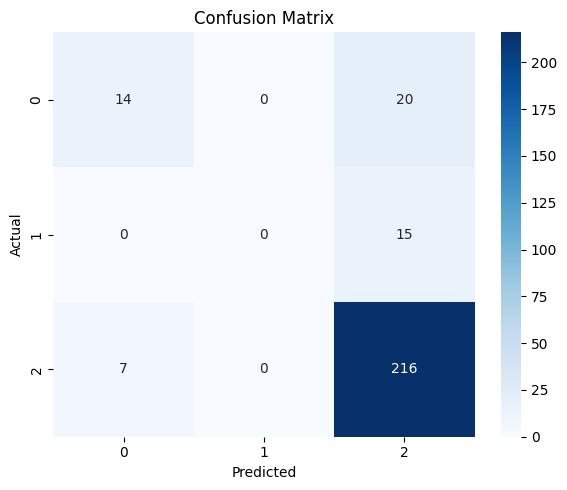

In [49]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.savefig('Confusion.png')
plt.show()

# ✅ Final Thoughts


*   The Random Forest Classifier trained on the wine quality dataset achieved an accuracy of 0.85 on the test set.

*  This means the model was able to correctly predict the wine quality for 85% of the samples it had not seen during training. Such a high accuracy demonstrates the effectiveness of the Random Forest algorithm for this classification task and the strong relationship between the wine's chemical properties and its quality rating.





🎯 What We Achieved:


*   🔍 Explored and understood quality grade of red wine
*   📊 Visualized relationships using data analysis
*🧠 Trained multiple ML models to detect depression
*🏁 Identified the most accurate model (Logistic Regression)

🙌Thank you !

---


 for taking the time to review this project. This work represents not only the application of machine learning techniques such as the Random Forest Classifier to the Wine Quality dataset but also a step forward in leveraging data-driven solutions for real-world challenges.
I appreciate the guidance and support received throughout the project, and hope that these insights can help inspire further exploration and innovation in the field.